# Installing libraries

In [1]:
!pip install yfinance
!pip install pandas_ta

import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=0f6ae1967d1ab4764b296c3aa8cd22baecf6bfc0f52c3c985ec01f4a1b1b6463
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


# Downloading and exploring the dataset

In [2]:
# Donwloading the dataset with data on EURPLN currency pair from the last 10 years with time interval of 1 day
df = yf.download(tickers='EURPLN=X',
                 period='3832d',
                 interval='1d')
df = df.drop(['Volume', 'Adj Close'], axis=1) # Dropping unnecessary columns
df.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2008-10-30,3.5458,3.6247,3.4245,3.6000
2008-10-31,3.6001,3.6508,3.4984,3.5700
2008-11-03,3.5322,3.5858,3.4769,3.5035
2008-11-04,3.5173,3.5540,3.4674,3.5108
2008-11-05,3.5107,3.5390,3.4629,3.5222
2008-11-06,3.5222,3.6412,3.4902,3.6347
2008-11-07,3.6337,3.6880,3.5673,3.6460
2008-11-10,3.6374,3.7722,3.5852,3.7298
2008-11-11,3.7525,3.8410,3.7377,3.7731


In [3]:
df.shape
# The dataset has 3829 rows and 4 columns

(3829, 4)

In [4]:
df.reset_index(inplace=True) # Resetting index

df['Date'] = df['Date'].dt.date # Changing type of the Date column to datetime

In [5]:
df.isna().sum() # Checking for missing values

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

# Feature Engineering

In [6]:
df['ATR'] = df.ta.atr(length=20) # Calculating the Average True Range for the last 20 rows
df['MA30'] = df.ta.sma(length=30) # Calculating the Moving Average for the laast 30 days
df['MA60'] = df.ta.sma(length=60) # Calculating the Moving Average for the laast 60 days
df['MA90'] = df.ta.sma(length=90) # Calculating the Moving Average for the laast 90 days
df['MA180'] = df.ta.sma(length=180) # Calculating the Moving Average for the laast 180 days


In [7]:
df['DRange'] = df['Close'] - df['Open'] # Calculating the daily range for each sample

In [8]:
df['%Change'] = np.round((df['Close'] / df['Open']) - 1, 4) # Calculating the percentage change between "Close" and "Open" columns for each sample

In [9]:
df.isna().sum() # Checking for missing values

Date         0
Open         0
High         0
Low          0
Close        0
ATR         20
MA30        29
MA60        59
MA90        89
MA180      179
DRange       0
%Change      0
dtype: int64

In [10]:
df = df.dropna() # As there is a significant number of missing values in the newly created columns, I am going to drop them

In [11]:
df.head()

,Date,Open,High,Low,Close,ATR,MA30,MA60,MA90,MA180,DRange,%Change
179,2009-07-08,4.4106,4.4365,4.3999,4.4146,0.065513,4.476633,4.439897,4.466186,4.310643,0.0040,0.0009
180,2009-07-09,4.4210,4.4238,4.3413,4.3497,0.066362,4.470757,4.441042,4.461817,4.314808,-0.0713,-0.0161
181,2009-07-10,4.3493,4.3898,4.3249,4.3660,0.066289,4.467063,4.442317,4.457962,4.319230,0.0167,0.0038
182,2009-07-13,4.3774,4.4109,4.3658,4.3925,0.065229,4.464707,4.441928,4.454073,4.324169,0.0151,0.0034
183,2009-07-14,4.3906,4.3957,4.2801,4.3104,0.067748,4.459553,4.440760,4.450557,4.328611,-0.0802,-0.0183


# Splitting the data

In [12]:
df_train = df.iloc[0:3000] # Selecting the first 3000 rows as the training data

df_train = df_train.drop(['Date'], axis=1) # Dropping unnecessary column
df_train.reset_index(inplace=True)
df_train.head()

,index,Open,High,Low,Close,ATR,MA30,MA60,MA90,MA180,DRange,%Change
0,179,4.4106,4.4365,4.3999,4.4146,0.065513,4.476633,4.439897,4.466186,4.310643,0.0040,0.0009
1,180,4.4210,4.4238,4.3413,4.3497,0.066362,4.470757,4.441042,4.461817,4.314808,-0.0713,-0.0161
2,181,4.3493,4.3898,4.3249,4.3660,0.066289,4.467063,4.442317,4.457962,4.319230,0.0167,0.0038
3,182,4.3774,4.4109,4.3658,4.3925,0.065229,4.464707,4.441928,4.454073,4.324169,0.0151,0.0034
4,183,4.3906,4.3957,4.2801,4.3104,0.067748,4.459553,4.440760,4.450557,4.328611,-0.0802,-0.0183


In [13]:
df_test = df.iloc[3000:] # Selecting the remaining columns as the testing data
df_test =df_test.drop(['Date'], axis=1) # Dropping unnecessary column
df_test.reset_index(inplace=True)
df_test.shape
# The testing data has 650 rows and 12 columns

(650, 12)

In [14]:
scaler = StandardScaler() # Creating a scaler object to normalize the data
df_train_scaler = scaler.fit_transform(df_train) # Fitting the scaler to the training data

scaler1 = StandardScaler() # Creating a second scaler object in order to be able to reverse the normalization for the target variable
df_train_scaler_y = scaler1.fit_transform(df_train[['Close']])

df_train_scaler.shape # Normalized dataset has 3000 rows and 12 columns

(3000, 12)

In [16]:
# Creating 2 empty lists for the target and predictor variables
x_train = []
y_train = []

for i in range(7,3000):
  x_train.append(df_train_scaler[i-7:i])
  y_train.append(df_train_scaler_y[i][0])
# Appending the data in a suitable shape for the RNN as 3 dimensional input is needed and I decided the number of steps to be 7

In [17]:
# Changing the variables from lists to arrays to fit the RNN model
x_train = np.array(x_train)
y_train = np.array(y_train)

In [18]:
# Shapes of the training data
print(x_train.shape)
print(y_train.shape)

(2993, 7, 12)
(2993,)


In [25]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout

model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(7, 12))) # Choosing 64 units and setting "return_sequences" to true in odrer to stack LSTM layers
model.add(Dropout(0.2)) # Setting the dropout to 0.5 to prevent overfitting
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1)) # Adding a dense layer with unit to get a prediction

model.summary()
# The model has over 50 thousand parameters



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 7, 128)            72192     
                                                                 
 dropout_4 (Dropout)         (None, 7, 128)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 121,665
Trainable params: 121,665
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compiling the model with adam optimizer and MSE loss due to the fact I want to predict specific values
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

In [27]:
history = model.fit(x_train, y_train, epochs=60, batch_size=128) # Training the model

Epoch 1/60
24/24 [==============================] - 6s 43ms/step - loss: 0.2054 - MSE: 0.2054
Epoch 2/60
24/24 [==============================] - 1s 40ms/step - loss: 0.0594 - MSE: 0.0594
Epoch 3/60
24/24 [==============================] - 1s 42ms/step - loss: 0.0479 - MSE: 0.0479
Epoch 4/60
24/24 [==============================] - 1s 41ms/step - loss: 0.0421 - MSE: 0.0421
Epoch 5/60
24/24 [==============================] - 1s 41ms/step - loss: 0.0408 - MSE: 0.0408
Epoch 6/60
24/24 [==============================] - 1s 41ms/step - loss: 0.0395 - MSE: 0.0395
Epoch 7/60
24/24 [==============================] - 1s 45ms/step - loss: 0.0361 - MSE: 0.0361
Epoch 8/60
24/24 [==============================] - 2s 77ms/step - loss: 0.0361 - MSE: 0.0361
Epoch 9/60
24/24 [==============================] - 2s 65ms/step - loss: 0.0331 - MSE: 0.0331
Epoch 10/60
24/24 [==============================] - 1s 41ms/step - loss: 0.0320 - MSE: 0.0320
Epoch 11/60
24/24 [==============================] - 1s 42m

After 60 epochs, the model achieved MSE of 0.0153 and loss of 0.0153

In [30]:
last_7_df_train = df_train[-7:]
 # Getting the last 7 samples from training data
# to be able to predict the last 7 samples from test data as the steps are set to 7

df_test_all = pd.concat((last_7_df_train, df_test)) # Concatenating test data with the last 7 samples
df_test_all

,index,Open,High,Low,Close,ATR,MA30,MA60,MA90,MA180,DRange,%Change
2993,3172,4.57883,4.62119,4.54885,4.57891,0.044186,4.470947,4.499994,4.488477,4.474124,0.00008,0.0000
2994,3173,4.53560,4.56310,4.52160,4.53210,0.044842,4.473223,4.500827,4.489877,4.474075,-0.00350,-0.0008
2995,3174,4.55642,4.56025,4.52551,4.55664,0.044337,4.476306,4.502393,4.491811,4.474185,0.00022,0.0000
2996,3175,4.55311,4.56022,4.53009,4.55300,0.043626,4.479104,4.504031,4.493560,4.474283,-0.00011,-0.0000
2997,3176,4.52892,4.53342,4.50340,4.52918,0.043925,4.481424,4.504662,4.495147,4.474179,0.00026,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...
645,3824,4.43050,4.44414,4.40890,4.43050,0.034335,4.471598,4.527412,4.580531,4.641513,0.00000,0.0000
646,3825,4.43390,4.43401,4.41250,4.43390,0.033694,4.469393,4.523207,4.577450,4.639566,0.00000,0.0000
647,3826,4.43200,4.46196,4.42290,4.43200,0.033962,4.467555,4.519288,4.574421,4.637717,0.00000,0.0000
648,3827,4.46361,4.50206,4.45540,4.46361,0.035767,4.466092,4.516194,4.572138,4.636176,0.00000,0.0000


In [31]:
df_test_all_scaler = scaler.transform(df_test_all) # Normalizing the test data to be able to make predictions on it
df_test_all_scaler.shape

(657, 12)

In [32]:
x_pred = [] # Creating list where the reshaped test data will be stored

for i in range(7,657):
  x_pred.append(df_test_all_scaler[i-7:i]) # Reshaping the normalized test data to fit the input shape of the model

x_pred = np.array(x_pred) # Changing the type of data from list to array

In [33]:
x_pred.shape
# The shape of the test data is 650, 7, 12 which is the correct format for making predictions

(650, 7, 12)

In [34]:
y_pred = model.predict(x_pred) # Storing the predicitons of test data in y_pred variable
y_pred = scaler1.inverse_transform(y_pred) # Reversing the normalization with scaler made earlier during this project

21/21 [==============================] - 1s 7ms/step


In [35]:
# Making a dataframe of the predictions made with the model
y_pred = pd.DataFrame(y_pred, columns=['Close Prediction'])
y_pred

,Close Prediction
0,4.512490
1,4.512684
2,4.516983
3,4.522213
4,4.536087
...,...
645,4.439789
646,4.425348
647,4.422359
648,4.434681


In [36]:
df_scores = pd.concat((y_pred, df_test), axis=1) # Concatenating the test dataframe and the predictions
df_scores = df_scores[['index', 'Close', 'Close Prediction']] # Dropping all the irrelevant columns
df_scores

,index,Close,Close Prediction
0,3179,4.51019,4.512490
1,3180,4.52250,4.512684
2,3181,4.51923,4.516983
3,3182,4.53620,4.522213
4,3183,4.53660,4.536087
...,...,...,...
645,3824,4.43050,4.439789
646,3825,4.43390,4.425348
647,3826,4.43200,4.422359
648,3827,4.46361,4.434681


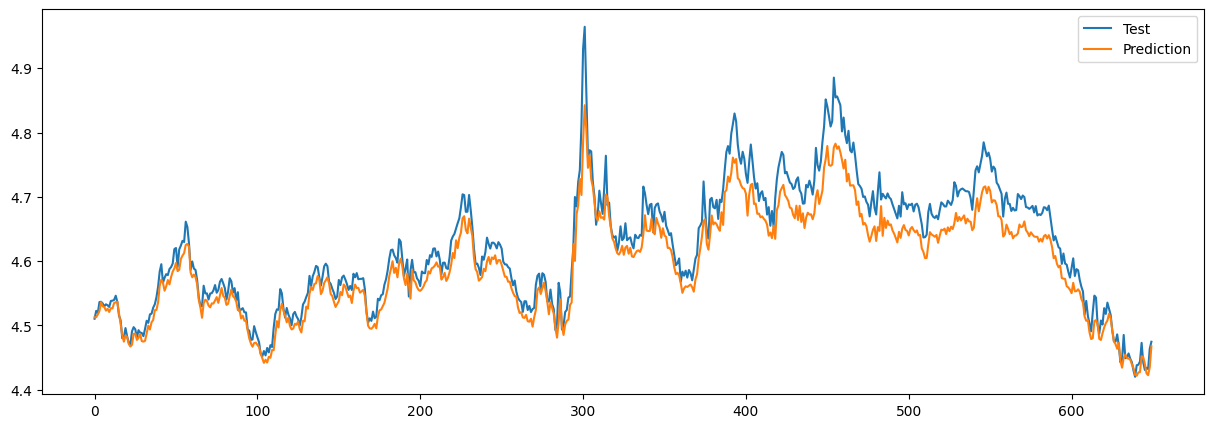

In [37]:
# Plotting the actual and predicted price of the currency pair EURPLN
plt.figure(figsize=(15,5))
plt.plot(df_scores['Close'],label = 'Test')
plt.plot(df_scores['Close Prediction'], label = 'Prediction')
plt.legend(loc='best')
plt.show()